In [1]:
import Aluminum

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import itertools

print(Aluminum.pseudo_name_list)

['Al.rel-pbe-paw.UPF', 'Al.rel-pbesol-uspp.UPF', 'Al.pz-vbc.UPF', 'Al.pbe-uspp.UPF']


In [5]:
import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
#     'font.size' : 14.4,
    'font.size' : 17.28,
    'text.usetex': True,
    'pgf.rcfonts': False,
})

%matplotlib notebook

# Surface relaxation

In [33]:
work_dir = 'surface'
pseudo_name = Aluminum.pseudo_name_list[-2]
a_0 = 7.46834
n_layers = 5
df = Aluminum.make_surface_df_template(n_layers)

# vacuum_thickness_s = np.arange(10,34,2)
vacuum_thickness = 18

n_k_points_hor_s = np.arange(4,20,2)
# n_k_points_hor = 10

# ecutwfc_s = np.arange(10,40,5)
ecutwfc = 20

ecutrho_r = 4
degauss = 0.05
mixing_beta = 0.7
conv_thr_o = -6
n_k_points_ver = 1
k_points_shift = '1 1 0'

# for vacuum_thickness in tqdm(vacuum_thickness_s):
for n_k_points_hor in tqdm(n_k_points_hor_s):
# for ecutwfc in tqdm(ecutwfc_s):
    es,a_cs,t = Aluminum.surface_sim_relax(work_dir=work_dir,a_0=a_0,n_layers=n_layers,
                                           save_df=df,vacuum_thickness=vacuum_thickness,
                                           ecutwfc=ecutwfc,ecutrho_r=ecutrho_r,degauss=degauss,
                                           mixing_beta=mixing_beta,conv_thr_o=conv_thr_o,
                                           n_k_points_hor=n_k_points_hor,n_k_points_ver=n_k_points_ver,
                                           k_points_shift=k_points_shift)

# df.to_csv(work_dir+'/n_l5_optimizing_vacuum_nk10.csv')
df.to_csv(work_dir+'/n_l5_optimizing_n_k_hor_degauss0.05.csv')
# df.to_csv(work_dir+'/n_l5_optimizing_ecutwfc.csv')

100%|██████████| 8/8 [11:33<00:00, 125.58s/it]


In [5]:
df.keys()

Index(['pseudo_name', 'a_0', 'vacuum_thickness', 'n_layers', 'ecutwfc',
       'ecutrho_r', 'degauss', 'mixing_beta', 'conv_thr_o', 'n_k_points_hor',
       'n_k_points_ver', 'k_point_shift', 'total_energy', 'n_it', 'sim_time',
       'z atom 1', 'z atom 2', 'z atom 3'],
      dtype='object')

<IPython.core.display.Javascript object>


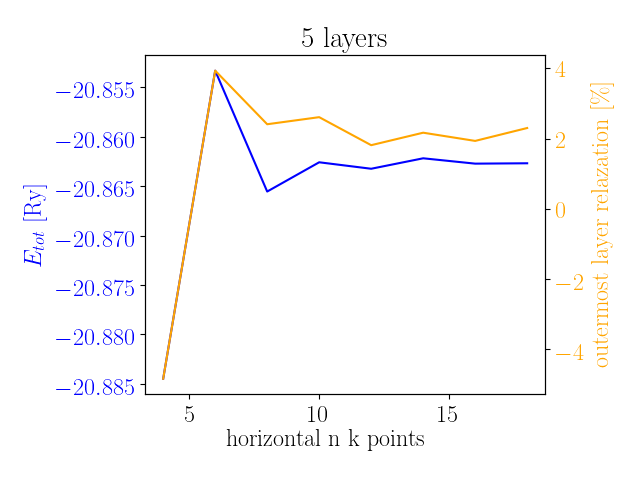

In [34]:
plot_time = False

# key = 'vacuum_thickness'
# name = 'n_l5_vacuum_nk10'

key = 'n_k_points_hor'
name = 'n_l5_n_k_hor_degauss0.05'

# key = 'ecutwfc'
# name = 'n_l5_ecutwfc'

fig,ax = plt.subplots()
if key == 'vacuum_thickness':
    ax.set_xlabel('vacuum thickness [a.u]')
if key == 'n_k_points_hor':
    ax.set_xlabel('horizontal n k points')
if key == 'ecutwfc':
    ax.set_xlabel('ecutwfc [Ry]')
color = 'blue'
ax.plot(df[key],df['total_energy'],color=color)
ax.set_ylabel('$E_{tot}$ [Ry]',color=color)
ax.tick_params(axis='y',labelcolor=color)

ax2 = ax.twinx()
color = 'orange'
if plot_time:
    ax2.plot(df[key],df['sim_time'],color=color)
    ax2.set_ylabel('simulation time [s]',color=color)
else:
    ax2.plot(df[key],((np.array(df['z atom 2']) - np.array(df['z atom 1']))*np.sqrt(2) - 1)*100,color=color)
    ax2.set_ylabel('outermost layer relazation [\%]',color=color)
ax2.tick_params(axis='y',labelcolor=color)

ax.xaxis.set_label_coords(0.45,-0.1)
ax.set_title('%d layers' %df['n_layers'][0])

fig.tight_layout()

fig.savefig('report/img/%s.pgf' %name)
fig.savefig('report/img/%s.png' %name)

In [37]:
ecutwfc = 35
name = 'al-nl3'

es,a_cs,t = Aluminum.surface_sim_relax(work_dir=work_dir,a_0=a_0,n_layers=n_layers,
                                       vacuum_thickness=vacuum_thickness,name=name,
                                       ecutwfc=ecutwfc,ecutrho_r=ecutrho_r,degauss=degauss,
                                       mixing_beta=mixing_beta,conv_thr_o=conv_thr_o,
                                       n_k_points_hor=n_k_points_hor,n_k_points_ver=n_k_points_ver,
                                       k_points_shift=k_points_shift)

In [47]:
atom_index = 2

((a_cs[-1,atom_index,2] - a_cs[-1,atom_index - 1,2])*np.sqrt(2) - 1)*100

33.095153934284546

3 layers:

    vacuum_thickness = 14
    ecutwfc = 35
    n_k_hor = 6
    n_k_ver = 1
    
    Delta_z_01 = 33.095%